In [ ]:
library(tidyverse)
library(ggplot2)
library(dplyr)    # alternatively, this also loads %>%
install.packages("stringr")
library(stringr)
install.packages("corrplot")
library(corrplot)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [ ]:
#DATA READING
#import .csv file
gpu_data <- read.csv("All_GPUs.csv")


In [ ]:
#L2_Cache convert
L2_IntConvert <- function(input_string) {
    pattern <- "^([0-9]+)KB(?:\\(x([0-9]+)\\))?$"

    # Initialize the result vector
    result <- vector("numeric", length(input_string))

    # Iterate over each input string
    for (i in seq_along(input_string))
    {
        # Get the current string
        current_string <- input_string[i]
        # Check for NA input
        if (is.na(current_string)) {
            result[i] <- NA
            next
        }
        # Perform regex search and extract matches
        matches <- regmatches(current_string, regexec(pattern, current_string))[[1]]
        # If no match, set result to NA
        if (length(matches) == 0) {
            result[i] <- NA
            next
        }

        # Extract the numeric part and optional multiplier
        numeric_value <- as.integer(matches[2])
        multiplier <- if (length(matches) > 2 && matches[3] != "") as.integer(matches[3]) else 1

        #"", "231", "KB", "x2"

        result[i] <- numeric_value * multiplier
    }

    return(result)
}


ROPs_IntConvert <- function(input_string) {
    pattern <- "^([0-9]+)(?:\\s*\\(x([0-9]+)\\))?$"
    result <- vector("numeric", length(input_string))

    for (i in seq_along(input_string)) {
        # Get the current string
        current_string <- input_string[i]
        # Check for NA input
        if (is.na(current_string)) {
            result[i] <- NA
            next
        }
        # Use regex to extract the numeric part and optional multiplier
        matches <- regmatches(current_string, regexec(pattern, current_string))[[1]]

        # If no match, return NA
        if (length(matches) == 0) {
            result[i] <- NA
            next
        }

         # Convert the numeric part and optional multiplier (default to 1) and calculate the result
        numeric_value <- as.integer(matches[2])
        multiplier <- if (length(matches) > 2 && matches[3] != "") as.integer(matches[3]) else 1

        result[i] <- numeric_value * multiplier
    }
    return(result)
}

In [ ]:
#DATA CLEANING
#standardize variables with units
gpu_data$Boost_Clock <- as.integer(gsub("\\D","",gpu_data$Boost_Clock))
gpu_data$Core_Speed <- as.integer(gsub("\\D","",gpu_data$Core_Speed))
gpu_data$Max_Power <- as.integer(gsub("\\D","",gpu_data$Max_Power))
gpu_data$Memory <- as.integer(gsub("\\D","",gpu_data$Memory))
gpu_data$Memory_Bandwidth <- as.numeric(gsub("[^0-9.]+","",gpu_data$Memory_Bandwidth))
gpu_data$Memory_Bus <- as.integer(gsub("\\D","",gpu_data$Memory_Bus))
gpu_data$Memory_Speed <- as.integer(gsub("\\D","",gpu_data$Memory_Speed))
gpu_data$Pixel_Rate <- as.integer(gsub("\\D","",gpu_data$Pixel_Rate))
gpu_data$Process <- as.integer(gsub("\\D","",gpu_data$Process))
gpu_data$Texture_Rate <- as.integer(gsub("\\D","",gpu_data$Texture_Rate))
gpu_data$L2_Cache <- L2_IntConvert(gpu_data$L2_Cache)


gpu_data$PSU_Watt <- str_extract(gpu_data$PSU,"\\d+(?= Watt)") %>% as.integer()
gpu_data$PSU_Amps <- str_extract(gpu_data$PSU, "\\d+(?= Amps)") %>% as.integer()

gpu_data$ROPs <- ROPs_IntConvert(gpu_data$ROPs)


[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "768KB" "768"   ""     
[1] "1536KB" "1536"   ""      
[1] "1536KB" "1536"   ""      
[1] "0KB" "0"   ""   
[1] "2304KB(x2)" "2304"       "2"         
[1] "0KB" "0"   ""   
[1] "1536KB" "1536"   ""      
[1] "512KB" "512"   ""     
[1] "0KB" "0"   ""   
[1] "768KB" "768"   ""     
[1] "768KB" "768"   ""     
[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "512KB" "512"   ""     
[1] "0KB" "0"   ""   
[1] "768KB" "768"   ""     
[1] "512KB" "512"   ""     
[1] "512KB" "512"   ""     
[1] "512KB" "512"   ""     
[1] "0KB" "0"   ""   
[1] "1024KB" "1024"   ""      
[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "0KB" "0"   ""   
[1] "512KB" "512"   ""     
[1] "512KB" "512"   ""     
[1] "0KB" "0"   ""   
[1] "512KB" "512"   ""     
[1] "512KB" "

In [ ]:
library(dplyr)


desired_columns <- c("Core_Speed","L2_Cache","Max_Power","Memory","Memory_Bandwidth","Memory_Bus","Memory_Speed","Memory_Type","Notebook_GPU","Open_GL","PSU_Amps","PSU_Watt","Pixel_Rate","Process","ROPs","TMUs","Texture_Rate")

# Create a new dataset with only the specified columns
New_gpu_data <- subset(gpu_data, select = desired_columns)
# Delete rows with value <NA> in column Architecture
#New_gpu_data <- New_gpu_data %>%
#    filter(!is.na(Architecture))

View(New_gpu_data)

,Core_Speed,L2_Cache,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Memory_Type,Notebook_GPU,Open_GL,PSU_Amps,PSU_Watt,Pixel_Rate,Process,ROPs,TMUs,Texture_Rate
,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,738,0,141,1024,64.0,256,1000,GDDR3,No,3.3,38,450,12,55,16,64,47
2,NA,0,215,512,106.0,512,828,GDDR3,No,3.1,35,550,12,80,16,16,12
3,NA,0,200,512,51.2,256,800,GDDR3,No,3.1,35,550,10,80,16,16,10
4,NA,0,NA,256,36.8,128,1150,GDDR4,No,3.3,NA,NA,3,65,4,8,7
5,NA,0,45,256,22.4,128,700,GDDR3,No,3.1,25,400,3,65,4,8,6
6,NA,0,50,256,35.2,128,1100,GDDR4,No,3.3,26,400,3,65,4,8,6
7,870,0,190,2048,134.4,256,1050,GDDR5,No,3.3,37,500,14,55,16,40,35
8,NA,0,150,256,51.2,256,800,GDDR3,No,3.1,30,550,7,80,12,12,7
9,NA,0,150,2048,160.0,256,1250,GDDR5,No,4.3,20,500,25,28,32,80,62


In [ ]:
instances = nrow(gpu_data)
colname <- names(gpu_data)

gpu_data[gpu_data == "" | "Un"]<- NA
missing_count <- colSums(is.na(New_gpu_data)) * 100 / instances
print(missing_count)

      Core_Speed         L2_Cache        Max_Power           Memory 
       27.480916         0.000000        18.349971        12.331180 
Memory_Bandwidth       Memory_Bus     Memory_Speed      Memory_Type 
        3.552554         1.820317         3.082795         1.644157 
    Notebook_GPU          Open_GL         PSU_Amps         PSU_Watt 
        0.000000         1.174398        44.274809        34.497945 
      Pixel_Rate          Process             ROPs             TMUs 
       15.971814        13.593658        15.795655        15.795655 
    Texture_Rate 
       15.971814 


In [ ]:
missing_data <- data.frame(feature = colname, non_missing = 100 - missing_count, missing = missing_count)
missing_data %>%
  pivot_longer(-feature) %>%
  ggplot( aes(x = feature, y = value, fill = name)) +
  geom_col(position = position_stack(vjust=1, reverse=TRUE)) +
  theme(axis.text.x = element_text(angle = 90,hjust = 1, vjust = 0.3)) +
  xlab("Features") +
  ylab("Percentages") +
  labs(fill = NULL)

ERROR: Error in data.frame(feature = colname, non_missing = 100 - missing_count, : arguments imply differing number of rows: 36, 17


In [ ]:
install.packages("VIM")
library(VIM)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘zoo’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘RcppEigen’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘Rcpp’, ‘laeken’, ‘ranger’


Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep




In [ ]:
gpu_KNN <- kNN(New_gpu_data, k = 58)
gpu_KNN <- gpu_KNN[, !grepl("_imp$", names(gpu_KNN))]
View(gpu_KNN)

Warning message in `[<-.data.table`(`*tmp*`, indexNA2s[, variable[j]], variable[j], :
“641.500000 (type 'double') at RHS position 1 out-of-range(NA) or truncated (precision lost) when assigning to type 'integer' (column 1 named 'Core_Speed')”
Warning message in `[<-.data.table`(`*tmp*`, indexNA2s[, variable[j]], variable[j], :
“36.500000 (type 'double') at RHS position 1 out-of-range(NA) or truncated (precision lost) when assigning to type 'integer' (column 3 named 'Max_Power')”
Warning message in `[<-.data.table`(`*tmp*`, indexNA2s[, variable[j]], variable[j], :
“852.500000 (type 'double') at RHS position 14 out-of-range(NA) or truncated (precision lost) when assigning to type 'integer' (column 7 named 'Memory_Speed')”
Warning message in `[<-.data.table`(`*tmp*`, indexNA2s[, variable[j]], variable[j], :
“35.500000 (type 'double') at RHS position 4 out-of-range(NA) or truncated (precision lost) when assigning to type 'integer' (column 11 named 'PSU_Amps')”
Warning message in `[<-.data.

Core_Speed,L2_Cache,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Memory_Type,Notebook_GPU,Open_GL,PSU_Amps,PSU_Watt,Pixel_Rate,Process,ROPs,TMUs,Texture_Rate
<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
738,0,141,1024,64.0,256,1000,GDDR3,No,3.3,38,450,12,55,16,64,47
641,0,215,512,106.0,512,828,GDDR3,No,3.1,35,550,12,80,16,16,12
650,0,200,512,51.2,256,800,GDDR3,No,3.1,35,550,10,80,16,16,10
910,0,36,256,36.8,128,1150,GDDR4,No,3.3,29,400,3,65,4,8,7
600,0,45,256,22.4,128,700,GDDR3,No,3.1,25,400,3,65,4,8,6
625,0,50,256,35.2,128,1100,GDDR4,No,3.3,26,400,3,65,4,8,6
870,0,190,2048,134.4,256,1050,GDDR5,No,3.3,37,500,14,55,16,40,35
650,0,150,256,51.2,256,800,GDDR3,No,3.1,30,550,7,80,12,12,7
927,0,150,2048,160.0,256,1250,GDDR5,No,4.3,20,500,25,28,32,80,62


In [ ]:
summary(New_gpu_data)

   Core_Speed        L2_Cache        Max_Power         Memory     
 Min.   : 100.0   Min.   :   0.0   Min.   :  1.0   Min.   :   16  
 1st Qu.: 790.0   1st Qu.:   0.0   1st Qu.: 49.0   1st Qu.: 1024  
 Median : 980.0   Median : 512.0   Median :105.0   Median : 2048  
 Mean   : 946.9   Mean   : 722.4   Mean   :125.6   Mean   : 2873  
 3rd Qu.:1090.0   3rd Qu.:1024.0   3rd Qu.:170.0   3rd Qu.: 4096  
 Max.   :1784.0   Max.   :6144.0   Max.   :780.0   Max.   :32000  
 NA's   :936                       NA's   :625     NA's   :420    
 Memory_Bandwidth   Memory_Bus      Memory_Speed  Memory_Type       
 Min.   :   1.0   Min.   :  32.0   Min.   : 100   Length:3406       
 1st Qu.:  28.8   1st Qu.: 128.0   1st Qu.: 800   Class :character  
 Median : 105.8   Median : 128.0   Median :1150   Mode  :character  
 Mean   : 138.2   Mean   : 205.4   Mean   :1176                     
 3rd Qu.: 194.6   3rd Qu.: 256.0   3rd Qu.:1502                     
 Max.   :1280.0   Max.   :8192.0   Max.   :2127   

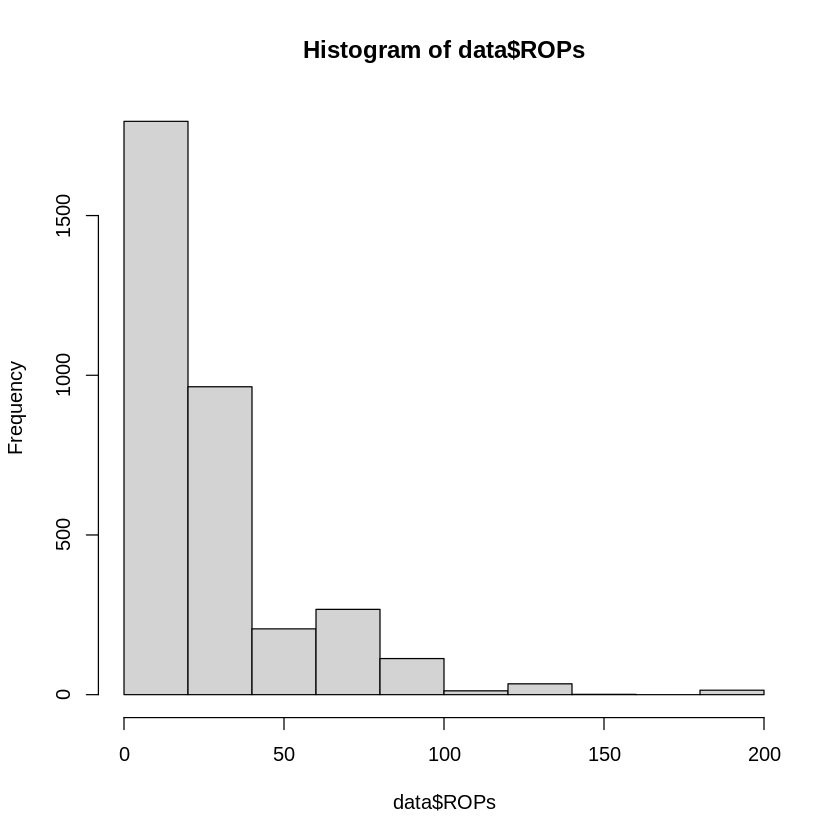

In [ ]:
data<- gpu_KNN
hist(data$ROPs)


,Core_Speed,L2_Cache,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Open_GL,PSU_Amps,PSU_Watt,Pixel_Rate,Process,ROPs,TMUs,Texture_Rate
Core_Speed,1.0000000,0.4850818,0.3980255,0.5599279,0.5222405,0.13989232,0.6852950,0.3497443,0.3524798,0.3481771,0.6526793,-0.44857526,0.5233979,0.5175192,0.6174050
L2_Cache,0.4850818,1.0000000,0.4894488,0.7028541,0.6538150,0.25587133,0.5189249,0.4116492,0.4427854,0.4464628,0.7896402,-0.46469180,0.7484283,0.5858270,0.7097475
Max_Power,0.3980255,0.4894488,1.0000000,0.6059018,0.8467082,0.40593434,0.4847851,0.3436464,0.8116231,0.8788168,0.6935685,-0.29211577,0.8166417,0.7635513,0.7662744
Memory,0.5599279,0.7028541,0.6059018,1.0000000,0.7860815,0.26483523,0.5741243,0.4149669,0.5827119,0.5843147,0.8277427,-0.49552600,0.7841425,0.6685801,0.8508041
Memory_Bandwidth,0.5222405,0.6538150,0.8467082,0.7860815,1.0000000,0.46798187,0.5612121,0.3729368,0.7713192,0.8066289,0.8436624,-0.40703801,0.8906306,0.8083818,0.9163357
Memory_Bus,0.1398923,0.2558713,0.4059343,0.2648352,0.4679819,1.00000000,0.0843914,0.1117624,0.3806206,0.3874432,0.2845767,-0.09169151,0.3667287,0.4823258,0.3542025
Memory_Speed,0.6852950,0.5189249,0.4847851,0.5741243,0.5612121,0.08439140,1.0000000,0.6581608,0.4567687,0.4359813,0.6077769,-0.70565975,0.5449085,0.6338860,0.6264550
Open_GL,0.3497443,0.4116492,0.3436464,0.4149669,0.3729368,0.11176243,0.6581608,1.0000000,0.3156784,0.3252456,0.3863072,-0.80706399,0.3794969,0.4347701,0.4009106
PSU_Amps,0.3524798,0.4427854,0.8116231,0.5827119,0.7713192,0.38062059,0.4567687,0.3156784,1.0000000,0.8232840,0.6527027,-0.26400210,0.7498804,0.7426792,0.7142005
PSU_Watt,0.3481771,0.4464628,0.8788168,0.5843147,0.8066289,0.38744316,0.4359813,0.3252456,0.8232840,1.0000000,0.6435672,-0.27088446,0.7665626,0.7437717,0.7321695


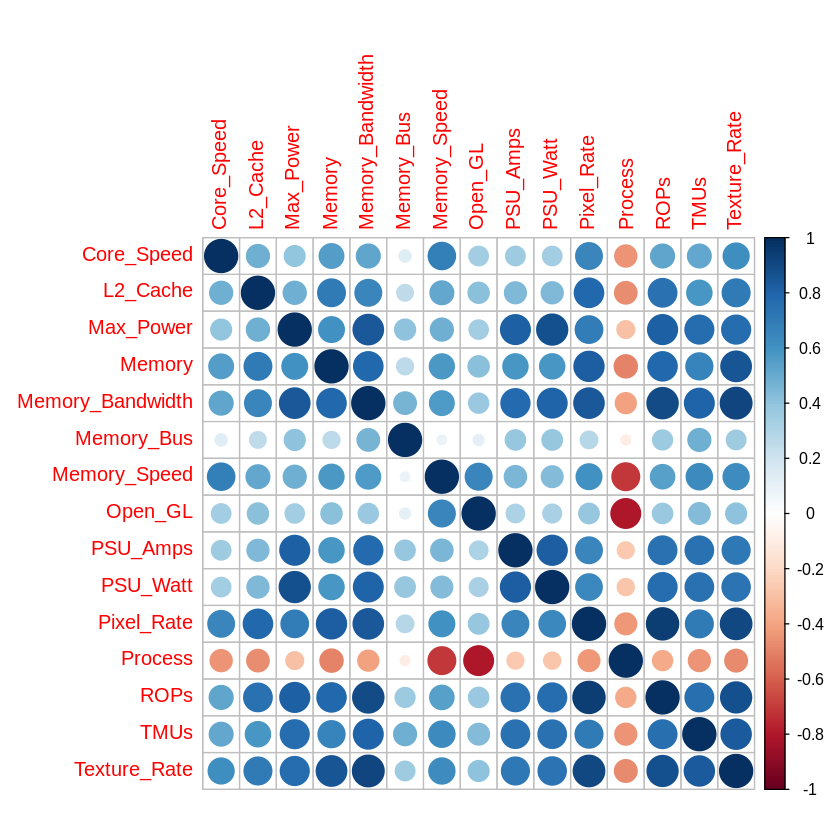

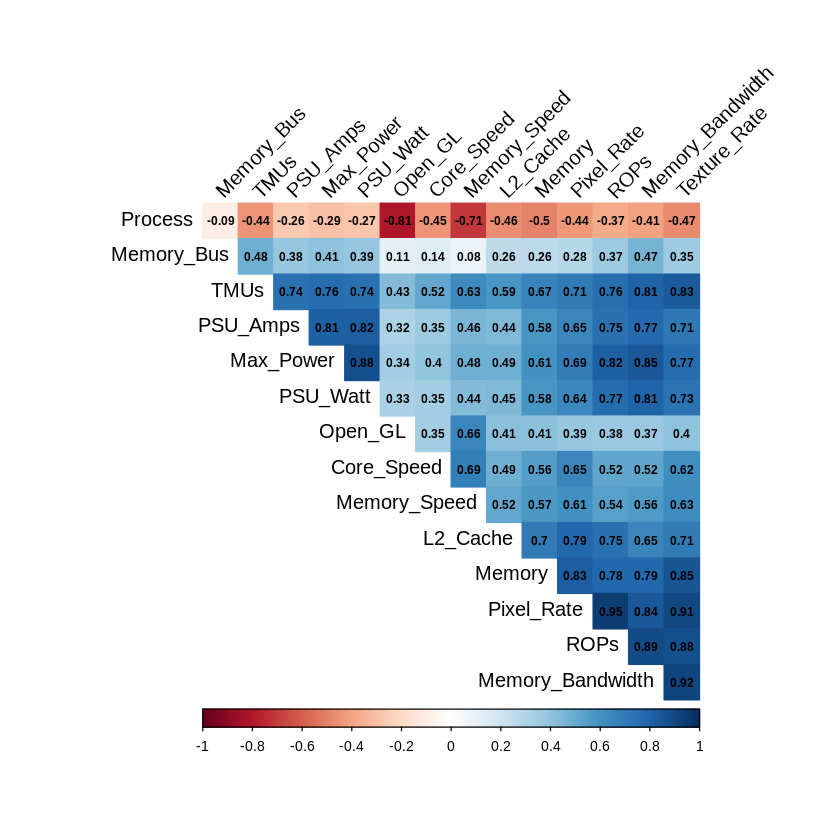

In [ ]:
# correlation coefficient between variables

delName <- c("Architecture","Dedicated","Direct_X","Manufacturer","Notebook_GPU","Memory_Type","Name","Power_Connector","Release_Date","Release_Price","SLI_Crossfire"
)
data <- gpu_KNN[, !names(gpu_KNN) %in% delName]

new_data <- sapply(data,as.numeric)
cor_matrix <- cor(new_data)
cor_matrix
corrplot(cor_matrix, method = "circle")

numeric_columns <- gpu_KNN[, sapply(gpu_KNN, is.numeric)]
numeric_columns <- gpu_KNN %>%
select_if(is.numeric)
library(dplyr)
numeric_columns <- gpu_KNN %>%
select_if(is.numeric)
cor_matrix <- cor(numeric_columns, use = "pairwise.complete.obs")
corrplot(cor_matrix, method = "color", type = "upper", order = "hclust",
tl.col = "black", tl.srt = 45, addCoef.col = "black", number.cex = 0.6,
diag = FALSE, cl.pos = "b", cl.cex = 0.7)

In [ ]:
  Core_Speed<-xtabs(~Core_Speed,data=gpu_KNN)
print(Core_Speed)
summary(Core_Speed)
L2_Cache<-xtabs(~L2_Cache,data=gpu_KNN)
print(L2_Cache)
#Manufacturer<-xtabs(~Manufacturer,data=gpu_KNN)
#print(Manufacturer)
Max_Power<-xtabs(~Max_Power,data=gpu_KNN)
print(Max_Power)
Memory<-xtabs(~Memory,data=gpu_KNN)
print(Memory)
Memory_Bandwidth<-xtabs(~Memory_Bandwidth,data=gpu_KNN)
print(Memory_Bandwidth)
Memory_Bus<-xtabs(~Memory_Bus,data=gpu_KNN)
print(Memory_Bus)
Memory_Speed<-xtabs(~Memory_Speed,data=gpu_KNN)
print(Memory_Speed)
Memory_Type<-xtabs(~Memory_Type,data=gpu_KNN)
print(Memory_Type)
Notebook_GPU<-xtabs(~Notebook_GPU,data=gpu_KNN)
print(Notebook_GPU)
Open_GL	<-xtabs(~Open_GL,data=gpu_KNN)
print(Open_GL)
PSU<-xtabs(~PSU_Amps,data=gpu_KNN)
print(PSU_Amps)
PSU<-xtabs(~PSU_Watt,data=gpu_KNN)
print(PSU_Watt)
Pixel_Rate<-xtabs(~Pixel_Rate,data=gpu_KNN)
print(Pixel_Rate)
Process<-xtabs(~Process,data=gpu_KNN)
print(Process)
ROPs<-xtabs(~ROPs,data=gpu_KNN)
print(ROPs)
TMUs<-xtabs(~TMUs,data=gpu_KNN)
print(TMUs)
Texture_Rate<-xtabs(~Texture_Rate,data=gpu_KNN)
print(Texture_Rate)



Core_Speed
 100  200  280  300  311  320  325  330  350  375  400  425  450  460  480  485 
   3   10    1  202    1    1    4    5   38    4   11    2   11    1    1    1 
 500  513  518  520  523  525  533  535  540  550  552  560  567  570  574  575 
  20    3    1    3    4    1    1    2    6   10    1    1    2    1    2   18 
 576  580  585  589  590  592  594  595  598  599  600  601  602  603  606  607 
   7    3    1    4    4    6    4    2    3    6   98   12    1    7   18    8 
 612  613  615  618  620  625  626  628  630  633  637  640  641  648  649  650 
   1    4    2    1   19   57    2    3    3    1    7    2    1    3    1   64 
 652  654  655  657  658  660  665  667  670  672  675  680  685  690  700  701 
   2    1    3    3    1    4    1    3    1    5   28    4    4    1   55    2 
 702  703  705  706  710  715  719  720  721  722  723  725  729  730  732  735 
   3    2    5    6    1    6   12    6    1    1    2   15    1   17    7    2 
 736  738  740  7

Number of cases in table: 3406 
Number of factors: 1 

L2_Cache
   0  128  256  384  512  640  768 1024 1152 1280 1536 1792 2048 2304 3072 4096 
 984  139  345  116  654   18  160  366    1    2   77   45  343    2  100   38 
4352 4608 6144 
   2    1   13 
Max_Power
  1   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22 
  1   6  17   2   9   4   4  15   9  19   8  21  58   2  12  30  24  46   1   1 
 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42 
 21   8  63  19  15  34  23  54   5  12  15   1 194   1   2  13   7  12   4   7 
 43  44  45  46  47  48  49  50  54  55  56  57  58  59  60  61  62  64  65  66 
  4  15 102   8  32  23  42  57   1  42   3   2   5   9  35   3   5  44  93  21 
 67  68  69  70  71  73  74  75  77  78  80  81  83  84  85  86  87  88  89  90 
  1   1   2   7   1   6   2 188   5   1  47   3   2   5  12  11   4   2   1  13 
 91  94  95  96 100 101 102 104 105 106 107 108 109 110 113 115 116 120 122 124 
  3   1  26   4  48   1   5   1  27  15   5  12   1  29   

ERROR: Error in eval(expr, envir, enclos): object 'PSU_Amps' not found


In [ ]:
delName <- c("Core_Speed", "L2_Cache", "Memory", "Memory_Bus", "Memory_Speed", "Memory_Type", "Notebook_GPU", "Open_GL", "Process")
gpu_KNN <- gpu_KNN[, !names(gpu_KNN) %in% delName]
View(gpu_KNN)

Max_Power,Memory_Bandwidth,PSU_Amps,PSU_Watt,Pixel_Rate,ROPs,TMUs,Texture_Rate
<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>
141,64.0,38,450,12,16,64,47
215,106.0,35,550,12,16,16,12
200,51.2,35,550,10,16,16,10
36,36.8,29,400,3,4,8,7
45,22.4,25,400,3,4,8,6
50,35.2,26,400,3,4,8,6
190,134.4,37,500,14,16,40,35
150,51.2,30,550,7,12,12,7
150,160.0,20,500,25,32,80,62


# New Section

In [ ]:
# Function to calculate median
calc_median <- function(x) {
  m <- median(x)
  data.frame(y = m, label = paste0("Median: ", round(m, 2)))
}

# Boxplot of Pixel_Rate
plot1 <- ggplot(gpu_KNN, aes(x = "Pixel Rate", y = Pixel_Rate)) +
  geom_boxplot() +
  stat_summary(fun.data = calc_median, geom = "text", vjust = -0.5) +
  labs(title = "Boxplot of Pixel Rate") +
  ylab("Frequency")

# Boxplot of Memory
plot2 <- ggplot(gpu_KNN, aes(x = "ROPs", y = ROPs)) +
  geom_boxplot() +
  stat_summary(fun.data = calc_median, geom = "text", vjust = -0.5) +
  labs(title = "Boxplot of ROPs") +
  ylab("Frequency")

# Boxplot of Memory_Bus
plot3 <- ggplot(gpu_KNN, aes(x = "TMUs", y = TMUs)) +
  geom_boxplot() +
  stat_summary(fun.data = calc_median, geom = "text", vjust = -0.5) +
  labs(title = "Boxplot of TMUs") +
  ylab("Frequency")

# Boxplot of Memory_Speed
plot4 <- ggplot(gpu_KNN, aes(x = "Texture Rate", y = Texture_Rate)) +
  geom_boxplot() +
  stat_summary(fun.data = calc_median, geom = "text", vjust = -0.5) +
  labs(title = "Boxplot of Texture Rate") +
  ylab("Frequency")

# Combine the plots
combined_plot <- plot_grid(plot1, plot2, plot3, plot4, ncol = 2)

# Display the combined plot
print(combined_plot)


ERROR: Error in plot_grid(plot1, plot2, plot3, plot4, ncol = 2): could not find function "plot_grid"


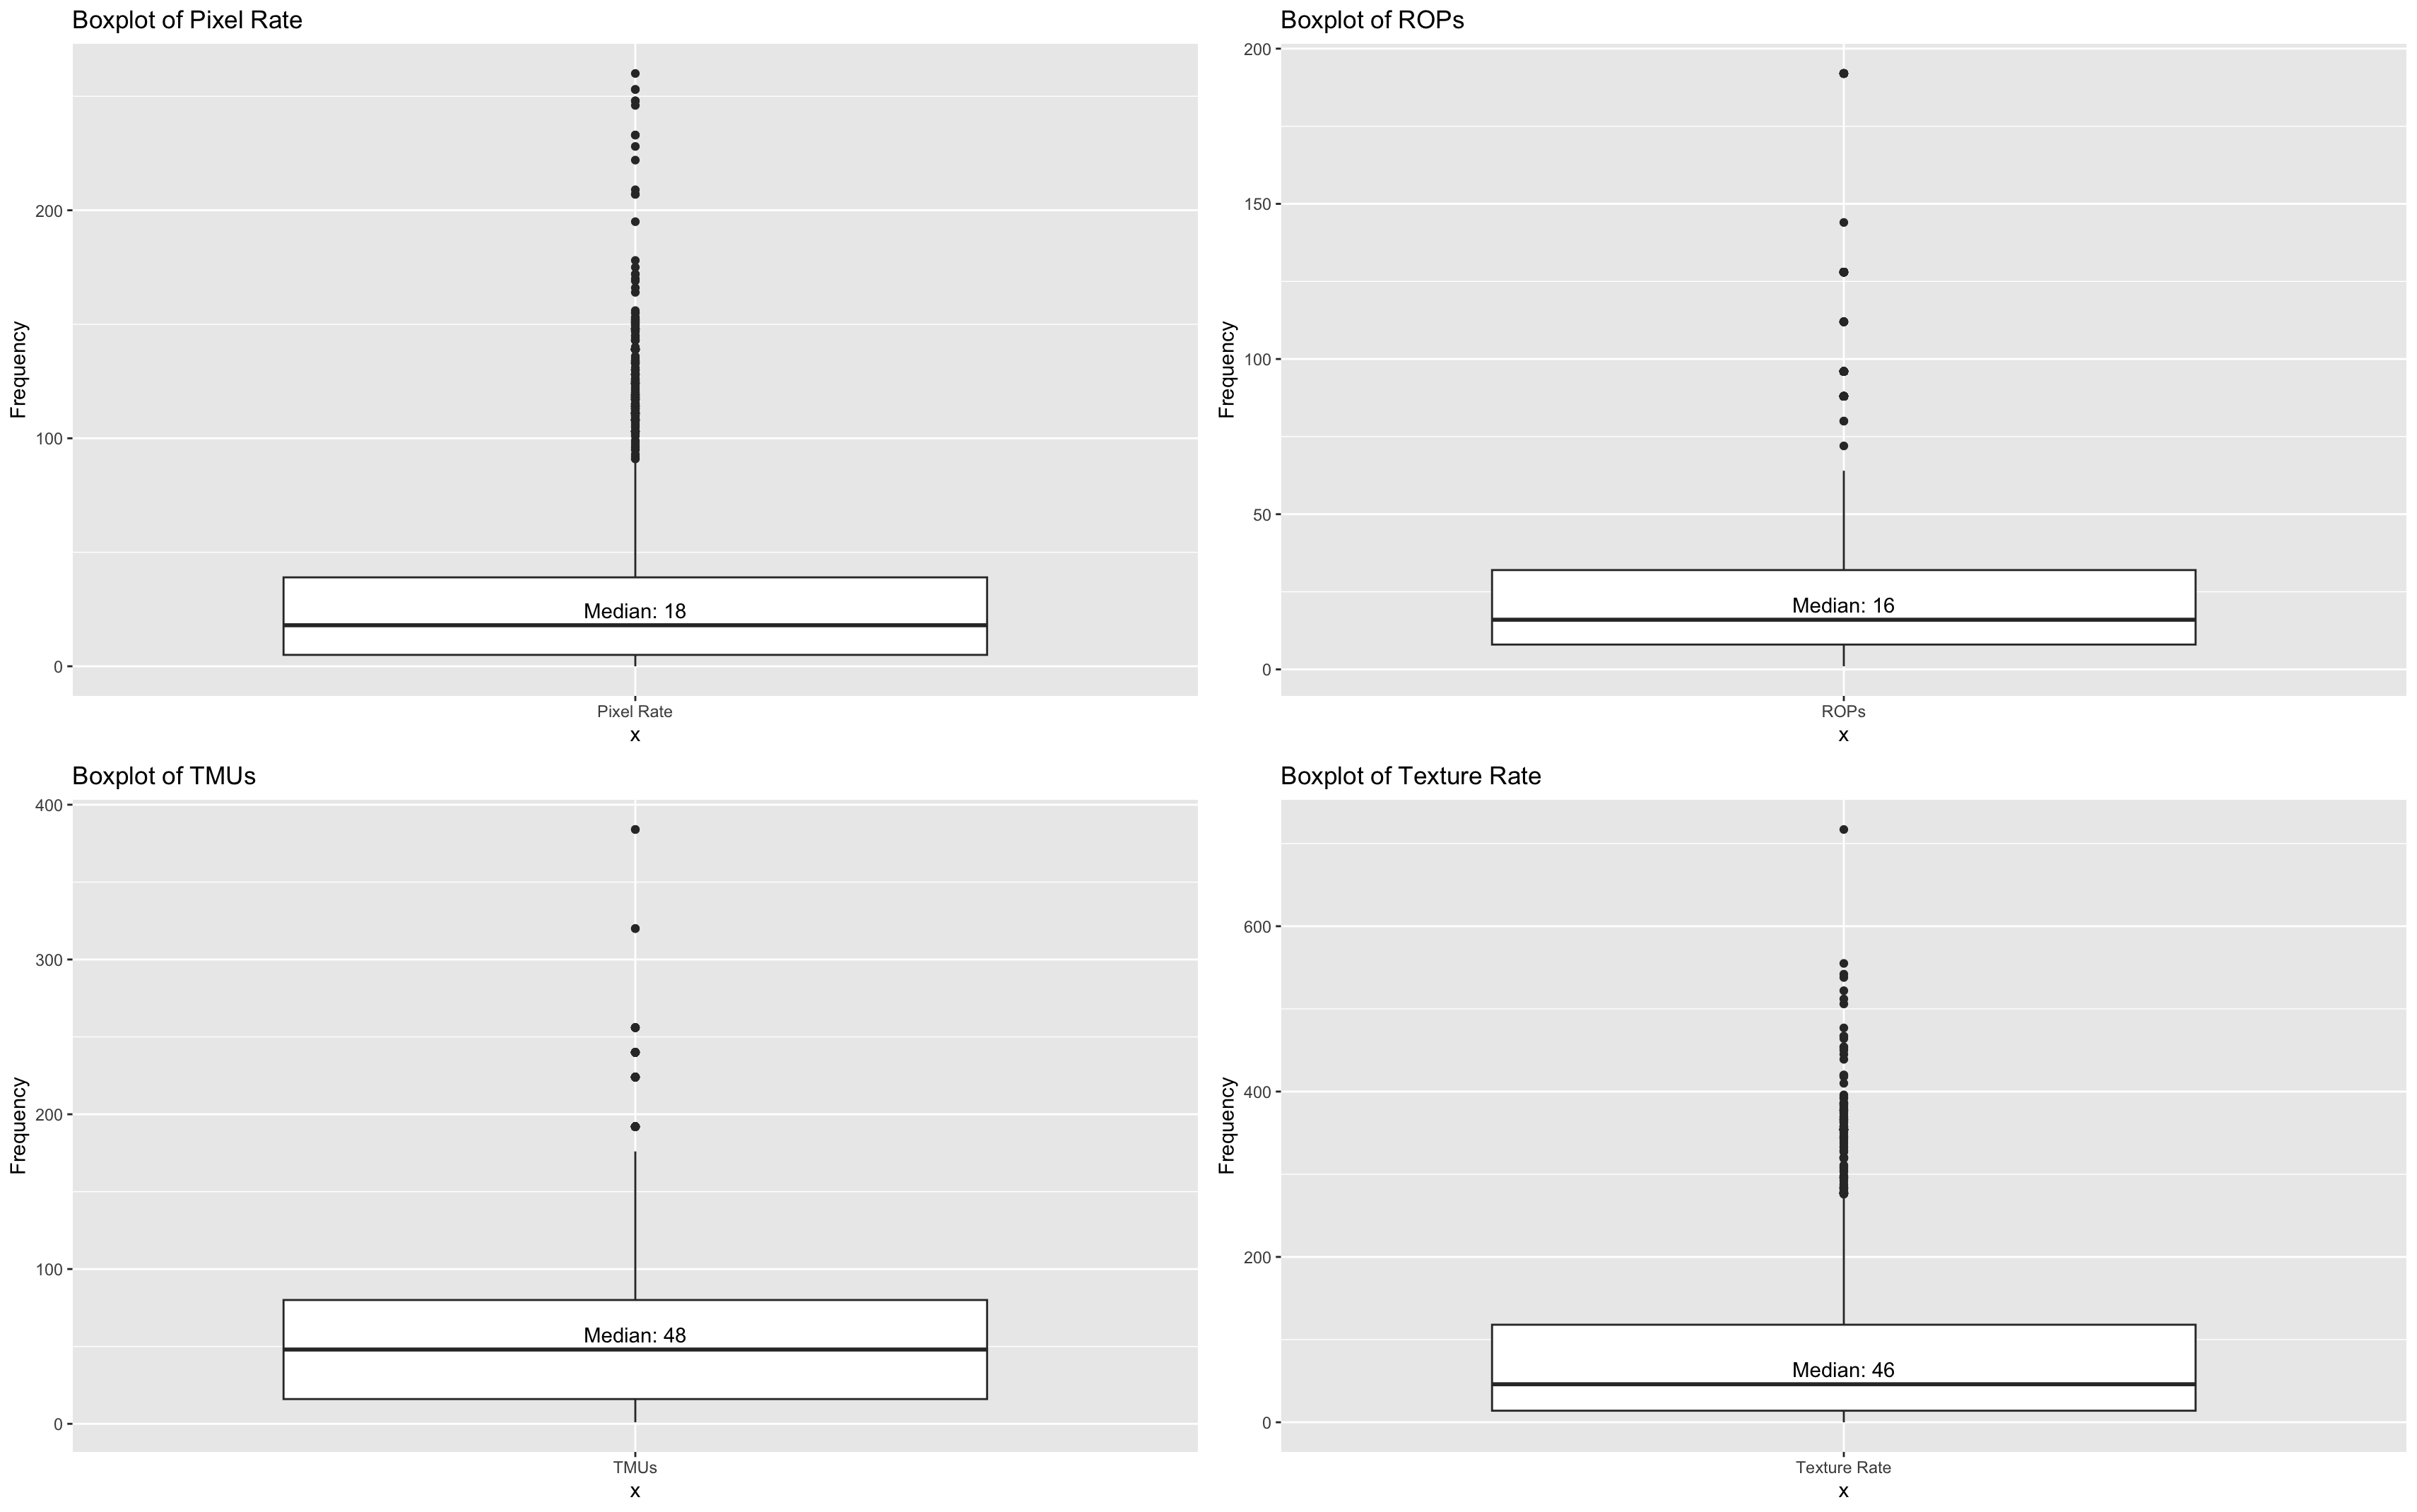

In [ ]:
# Plotting function for scatter plots
plot_scatter <- function(data, x_var, y_var) {
  ggplot(data, aes_string(x = x_var, y = y_var)) +
    geom_point() +
    labs(x = x_var, y = y_var) +
    theme_minimal()
}

# List of factors to plot against Memory_Bandwidth
factors <- c("PSU_Watt", "Max_Power", "Pixel_Rate", "ROPs", "TMUs", "Texture_Rate")

# Create a list to store the plots
plots <- lapply(factors, function(factor) {
  plot_scatter(gpu_data, x_var = factor, y_var = "Memory_Bandwidth")
})

# Combine all plots into one image
multiplot <- cowplot::plot_grid(plotlist = plots, nrow = 2)

# Display the combined image
multiplot

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


ERROR: Error in loadNamespace(x): there is no package called ‘cowplot’


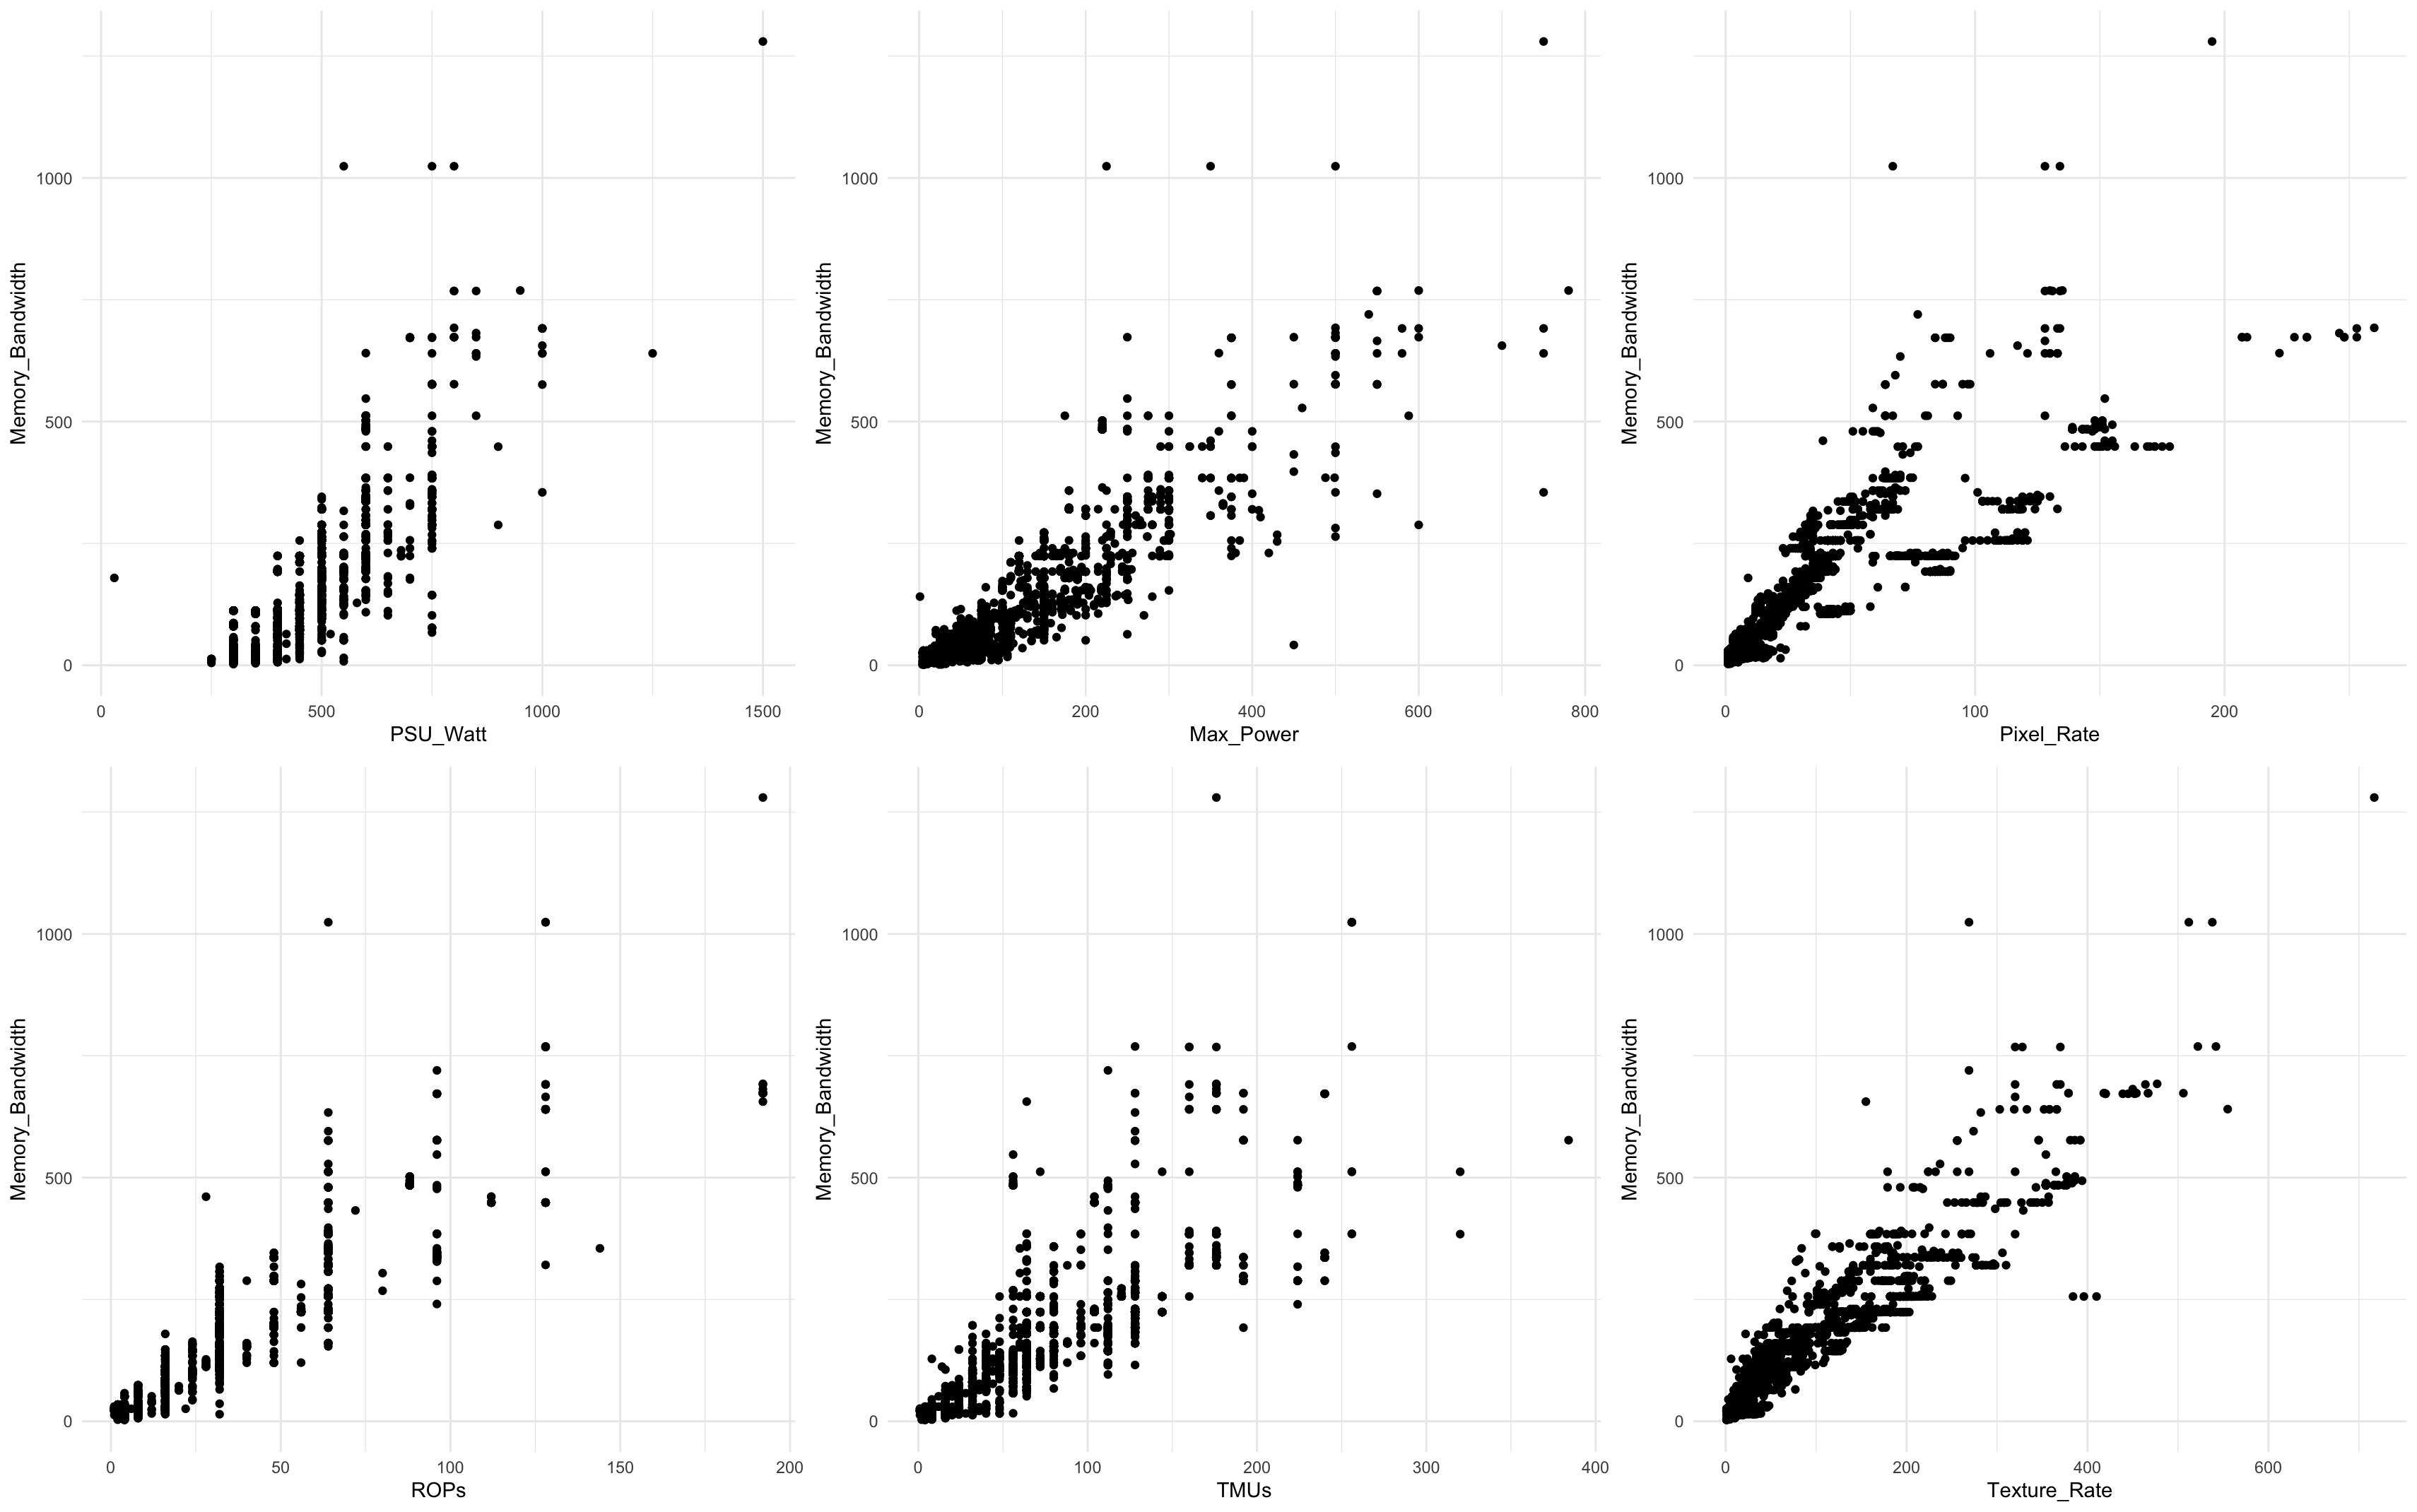

In [ ]:
plot_histogram_with_median <- function(data, x_var, title) {
  median_val <- median(data[[x_var]], na.rm = TRUE)
  ggplot(data, aes_string(x = x_var)) +
    geom_histogram(binwidth = 50, fill = "skyblue", color = "black") +
    geom_vline(xintercept = median_val, color = "red", linetype = "dashed", size = 1) + # Add median line
    labs(x = x_var, y = "Frequency", title = title) +
    theme_minimal()
}

# Create histograms for PSU_Watt and Max_Power with median
histograms_with_median <- list(
  plot_histogram_with_median(gpu_data, "PSU_Watt", "Histogram of PSU Watt"),
  plot_histogram_with_median(gpu_data, "Max_Power", "Histogram of Max Power")
)

# Combine the histograms into one image
combined_histogram_with_median <- cowplot::plot_grid(plotlist = histograms_with_median, ncol = 2)

# Display the combined image
print(combined_histogram_with_median)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


ERROR: Error in loadNamespace(x): there is no package called ‘cowplot’


In [ ]:
# @title VIF CHECKING


## **Multiple linear regression**


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some





Call:
lm(formula = Memory_Bandwidth ~ Max_Power + PSU_Watt + PSU_Amps + 
    Pixel_Rate + ROPs + TMUs + Texture_Rate, data = gpu_KNN)

Residuals:
    Min      1Q  Median      3Q     Max 
-280.61  -15.01   -3.43   12.40  981.98 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -32.19738    5.18100  -6.215 5.77e-10 ***
Max_Power      0.20462    0.01911  10.706  < 2e-16 ***
PSU_Watt       0.05918    0.01459   4.055 5.12e-05 ***
PSU_Amps       0.53050    0.18318   2.896   0.0038 ** 
Pixel_Rate    -1.14660    0.09779 -11.725  < 2e-16 ***
ROPs           2.24010    0.12779  17.530  < 2e-16 ***
TMUs          -0.07126    0.02761  -2.581   0.0099 ** 
Texture_Rate   1.00593    0.02718  37.010  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.48 on 3398 degrees of freedom
Multiple R-squared:  0.9037,	Adjusted R-squared:  0.9035 
F-statistic:  4556 on 7 and 3398 DF,  p-value: < 2.2e-16


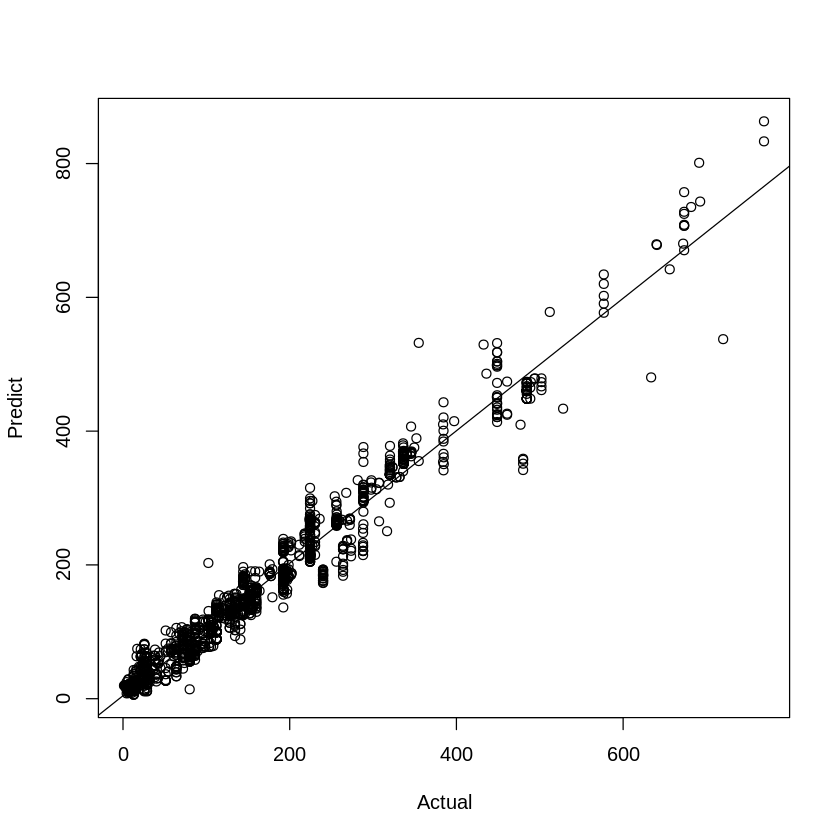

In [ ]:
install.packages("car")
library(car)

traindata <- gpu_KNN[1:1672,]
testdata <- gpu_KNN[1673:3344,]
# train_model
train_model = lm(formula = Memory_Bandwidth ~  Max_Power + PSU_Watt + PSU_Amps + Pixel_Rate + ROPs + TMUs + Texture_Rate, data = gpu_KNN)
summary(train_model)

#test_model
predictions <- predict(train_model, newdata = testdata)
testdata["MemBanPredict"]<-predictions

#Plot Actual and Predicted
plot(testdata$Memory_Bandwidth, testdata$MemBanPredict, xlab = "Actual", ylab = "Predict")
abline(lm(testdata$MemBanPredict~testdata$Memory_Bandwidth))

In [ ]:
#Checking model fitting on train_model
#vif checking
vif_data <- vif(train_model)
print(vif_data)
# Extract residuals
  # Add a reference line for comparison

# Multicollinearity assumption check


   Max_Power     PSU_Watt     PSU_Amps   Pixel_Rate         ROPs         TMUs 
    6.664730     5.621903     3.803482    22.513152    22.073742     4.204624 
Texture_Rate 
   10.927721 


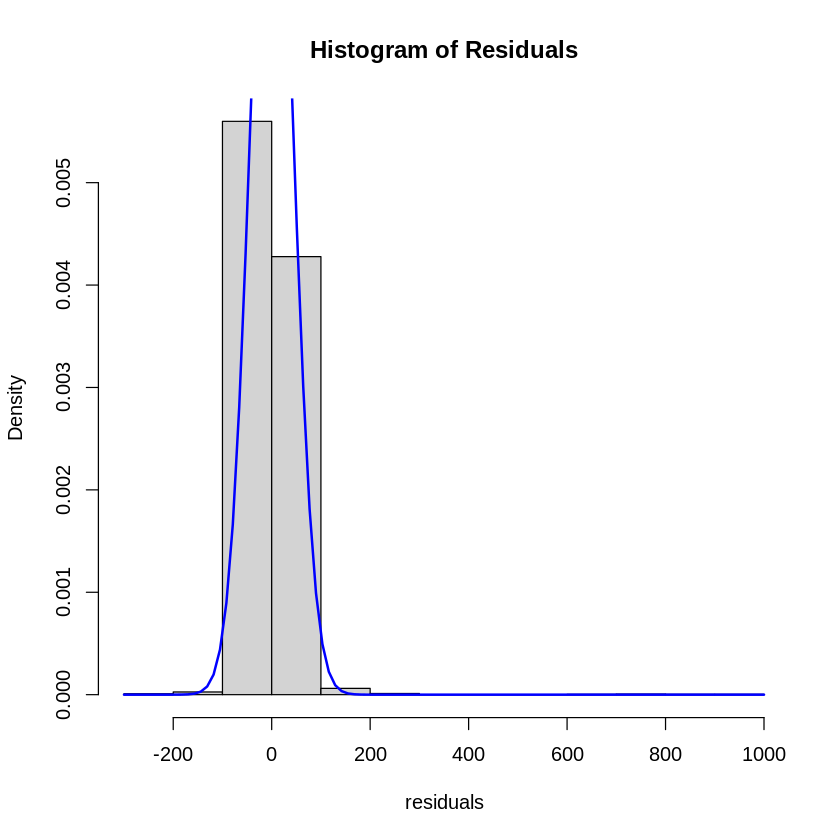

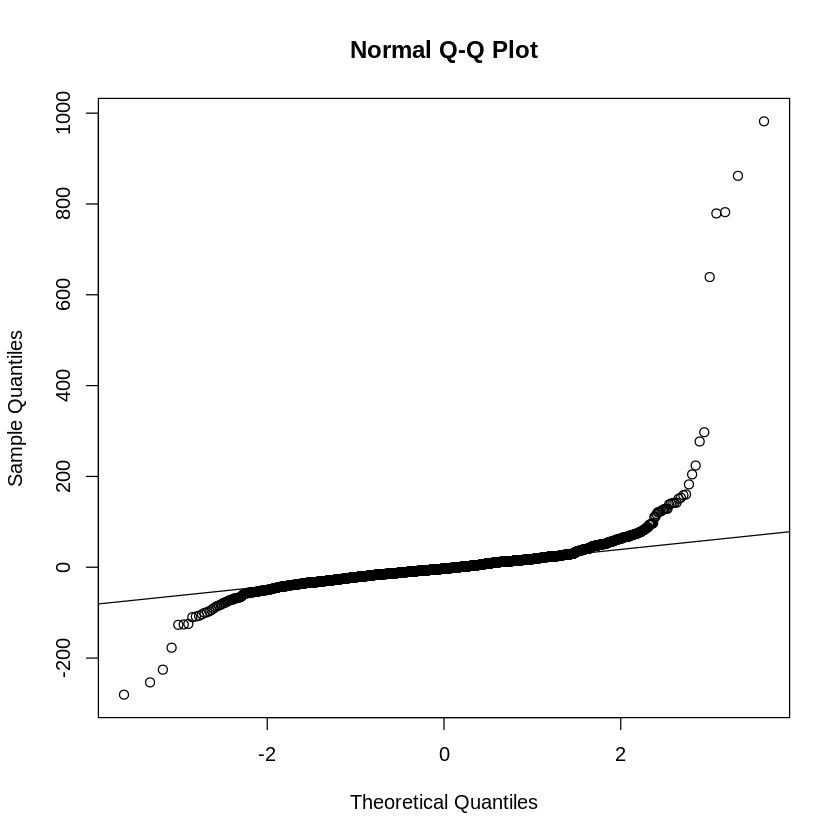

In [ ]:
residuals <- residuals(train_model)

#creates a histogram plot of residuals

hist(residuals, freq = FALSE, main = "Histogram of Residuals")
mu <- mean(residuals)
sigma <- sd(residuals)
curve(dnorm(x, mean = mu, sd = sigma), col = "blue", lwd = 2, add = TRUE)

# Create Q-Q plot
qqnorm(residuals)
qqline(residuals)


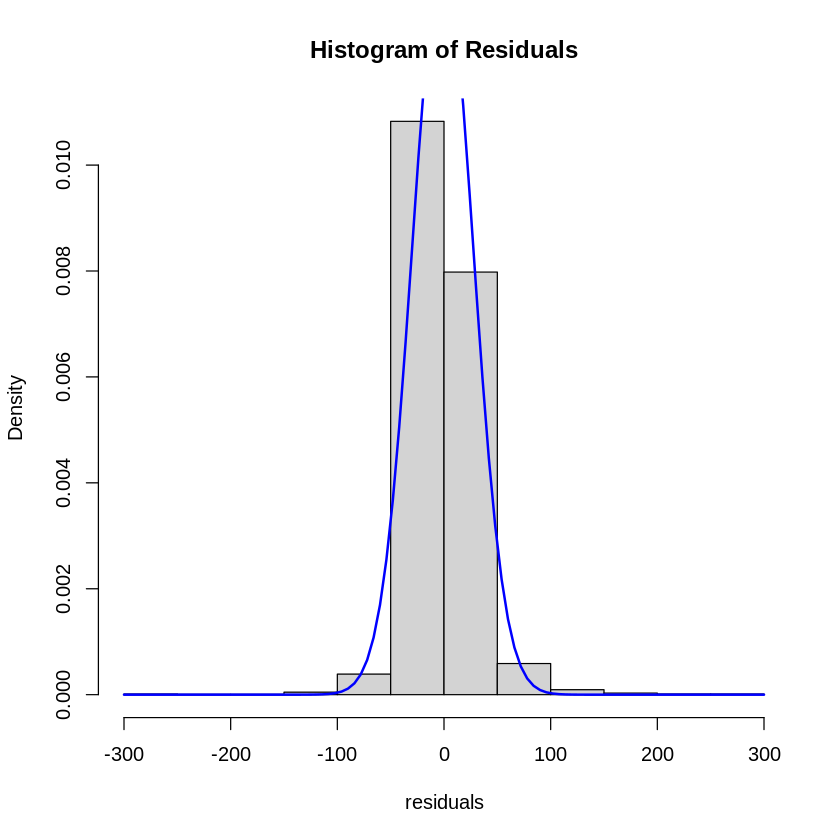

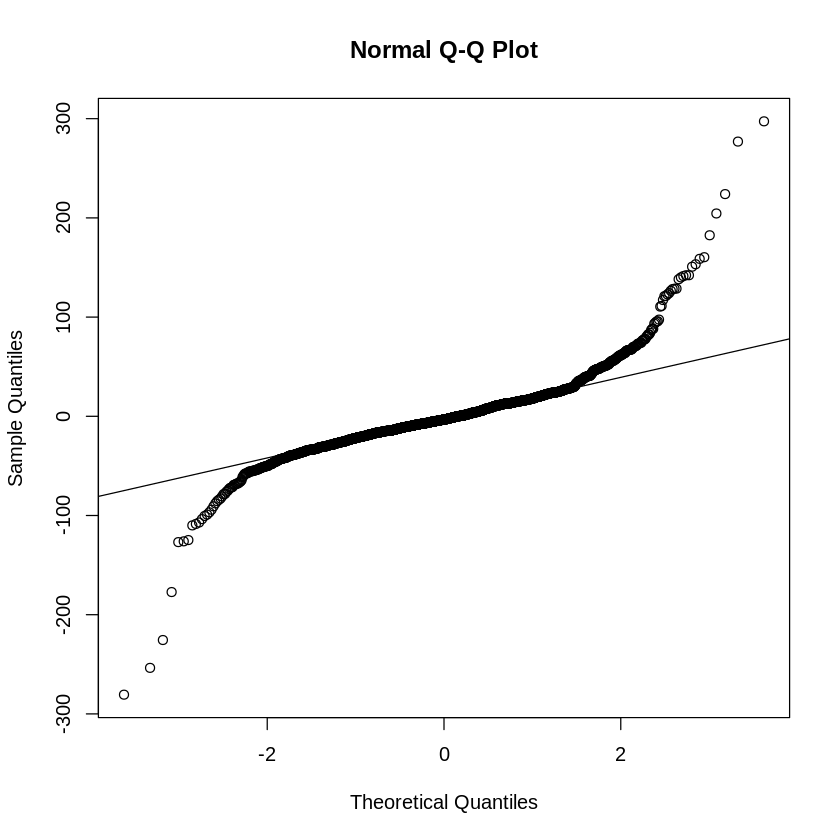

In [ ]:
residuals <- residuals[residuals < 500]
hist(residuals, freq = FALSE, main = "Histogram of Residuals")
mu <- mean(residuals)
sigma <- sd(residuals)
curve(dnorm(x, mean = mu, sd = sigma), col = "blue", lwd = 2, add = TRUE)
# Create Q-Q plot
qqnorm(residuals)
qqline(residuals)